<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing surprise library**

In [40]:
!pip install surprise


## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from sklearn.metrics import mean_squared_error

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/ElectiveProjects/ratings_Electronics.csv', header = None)

df.columns = ['user_id', 'prod_id', 'rating', 'timestamp']

df = df.drop('timestamp', axis = 1)

df_copy = df.copy(deep = True)

In [43]:
users = df.user_id

ratings_count = dict()

for user in users:

    if user in ratings_count:
        ratings_count[user] += 1

    else:
        ratings_count[user] = 1

In [44]:
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [45]:
prods = df.prod_id

ratings_count = dict()

for prod in prods:

    if prod in ratings_count:
        ratings_count[prod] += 1

    else:
        ratings_count[prod] = 1

In [46]:
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [47]:
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('user_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['user_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='rating', y='user_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

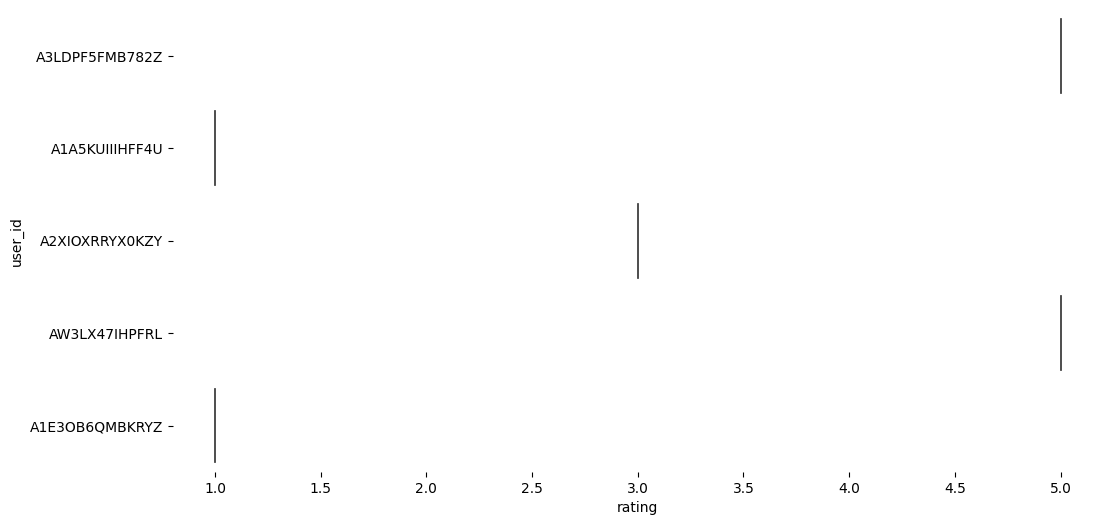

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['user_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='rating', y='user_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

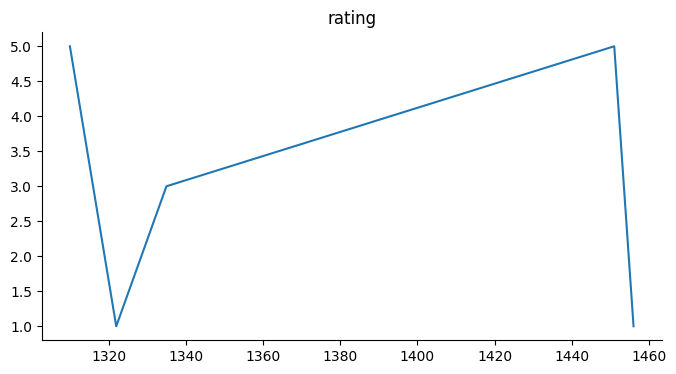

In [53]:
from matplotlib import pyplot as plt
_df_2['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [113]:
rows, columns = df_final.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  65290
No of columns:  3


**Write your observations here:______**

### **Data types**

In [115]:
df_final.dtypes

user_id     object
prod_id     object
rating     float64
dtype: object

**Write your observations here:______**

### **Checking for missing values**

In [117]:
df_final.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

**Write your observations here:______**

### **Summary Statistics**

In [118]:
df_final.rating.describe()

count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

**Write your observations here:______**

### **Checking the rating distribution**

<Axes: >

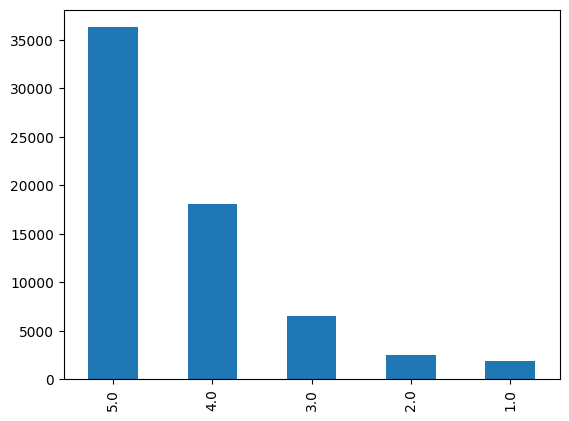

In [119]:
df_final.rating.value_counts().plot(kind='bar')



**Write your observations here:________**

### **Checking the number of unique users and items in the dataset**

In [58]:

print('The number of observations in the final data = ', len(df_final))
print('Number of unique USERS in Raw data = ', df_final['user_id'].sum)
print('Number of unique ITEMS in Raw data = ', df_final['prod_id'].sum)

The number of observations in the final data =  65290
Number of unique USERS in Raw data =  <bound method NDFrame._add_numeric_operations.<locals>.sum of 1310       A3LDPF5FMB782Z
1322       A1A5KUIIIHFF4U
1335       A2XIOXRRYX0KZY
1451        AW3LX47IHPFRL
1456       A1E3OB6QMBKRYZ
                ...      
7824423    A34BZM6S9L7QI4
7824424    A1G650TTTHEAL5
7824425    A25C2M3QF9G7OQ
7824426     A1E1LEVQ9VQNK
7824427    A2NYK9KWFMJV4Y
Name: user_id, Length: 65290, dtype: object>
Number of unique ITEMS in Raw data =  <bound method NDFrame._add_numeric_operations.<locals>.sum of 1310       1400501466
1322       1400501466
1335       1400501466
1451       1400501466
1456       1400501466
              ...    
7824423    B00LGQ6HL8
7824424    B00LGQ6HL8
7824425    B00LGQ6HL8
7824426    B00LGQ6HL8
7824427    B00LGQ6HL8
Name: prod_id, Length: 65290, dtype: object>


**Write your observations here:_______**

### **Users with the most number of ratings**

In [120]:
most_rated = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
dtype: int64

In [121]:
df_final.groupby('user_id')['rating'].count().sort_values(ascending=False).head(10)

user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
Name: rating, dtype: int64

**Write your observations here:_______**

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [122]:
average_rating = df_final.groupby('prod_id')['rating'].mean().sort_values(ascending=False)
count_rating = df_final.groupby('prod_id')['rating'].count().sort_values(ascending=False)
final_rating = pd.DataFrame(list(zip(average_rating, count_rating)), columns=['average_rating', 'count_rating'])
final_rating = final_rating.sort_values('average_rating', ascending=False)

final_rating.head()

,average_rating,count_rating
0,5.0,206
225,5.0,31
233,5.0,31
232,5.0,31
231,5.0,31


In [62]:

def top_n_products(final_rating, n, min_interaction):

    recommendations = final_rating[final_rating['count_rating'] >= min_interaction]


    recommendations = recommendations.sort_values('average_rating', ascending=False)

    return recommendations.index[:n]

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [63]:
top_5_products = top_n_products(final_rating, 5, 50)
print("Top 5 products based on popularity:\n", top_5_products)


Top 5 products based on popularity:
 Int64Index([0, 8, 20, 19, 3], dtype='int64')


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [64]:
top_5_products = top_n_products(final_rating, 5, 100)
print("Top 5 products based on popularity:\n", top_5_products)


Top 5 products based on popularity:
 Int64Index([0, 1, 11, 15, 14], dtype='int64')


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [123]:
from surprise import accuracy

from surprise.reader import Reader

from surprise.dataset import Dataset

from surprise.model_selection import GridSearchCV

from surprise.model_selection import train_test_split

from surprise.prediction_algorithms.knns import KNNBasic

from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise.model_selection import KFold

from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [124]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    user_est_true = defaultdict(list)

    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        user_ratings.sort(key = lambda x: x[0], reverse = True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])


        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0



        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision)

    print('Recall: ', recall)

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [125]:
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [126]:
reader = Reader(rating_scale = (0, 5))

data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [127]:
sim_options = {'name': 'cosine',
               'user_based': True}

sim_user_user = KNNBasic(k = 5, min_k = 1, sim_options = sim_options, verbose = False, random_state = 1)

sim_user_user.fit(trainset)

precision_recall_at_k(sim_user_user, k = 10, threshold = 3.5)

RMSE: 1.0183
Precision:  0.856
Recall:  0.854
F_1 score:  0.855


**Write your observations here:__________**

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [128]:
sim_user_user.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

**Write your observations here:__________**

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [129]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n]

In [130]:
n_users_not_interacted_with(5, df_final, '1400501466')

['A34BZM6S9L7QI4',
 'AFM2J3HJNPIHV',
 'A2WB7LZ595CR50',
 'ABQWMANK4AR63',
 'ATFBVUXDIRXT6']

* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.**

In [131]:
sim_user_user.predict("A2UOHALGF2X77Q", "1400501466", r_ui = 5, verbose = True)


user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=5, est=5, details={'actual_k': 1, 'was_impossible': False})

**Write your observations here:__________**

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
param_grid = {'k': [10, 20, 30, 40, 50], 'min_k': [1, 2, 3, 4, 5], 'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline']}}
gs = GridSearchCV(KNNBasic, param_grid, measures=['RMSE'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done 

In [133]:
sim_options =  {'name': 'pearson_baseline'}

sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 5, random_state = 1, verbose = False)
sim_user_user_optimized.fit(trainset)

precision_recall_at_k(sim_user_user_optimized, k = 10, threshold = 3.5)

RMSE: 0.9726
Precision:  0.838
Recall:  0.892
F_1 score:  0.864


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [134]:
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 5, random_state = 1, verbose = False)
sim_user_user_optimized.fit(trainset)
precision_recall_at_k(sim_user_user_optimized, k = 10, threshold = 3.5)


RMSE: 0.9726
Precision:  0.838
Recall:  0.892
F_1 score:  0.864


In [135]:
sim_options =  {'name': 'pearson_baseline'}

sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 5, random_state = 1, verbose = False)
sim_user_user_optimized.fit(trainset)

sim_user_user_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

precision_recall_at_k(sim_user_user_optimized, k = 10, threshold = 3.5)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
RMSE: 0.9726
Precision:  0.838
Recall:  0.892
F_1 score:  0.864


**Write your observations here:__________**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [136]:
sim_user_user_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:**____________

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [86]:
sim_user_user_optimized.get_neighbors(0, k=5)


[472, 162, 625, 29, 408]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

In [84]:
def get_recommendations(data, user_id, top_n, algo):

    recommendations = []

    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    for item_id in non_interacted_products:

        est = algo.predict(user_id, item_id).est

        recommendations.append((item_id, est))

    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n]

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [89]:

recommendations_user_user = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, sim_user_user_optimized)
print(recommendations_user_user)


[('1400532655', 4.292024046561495), ('1400599997', 4.292024046561495), ('9983891212', 4.292024046561495), ('B00000DM9W', 4.292024046561495), ('B00000J1V5', 4.292024046561495)]


In [91]:
df_recommendations_user_user = pd.DataFrame(recommendations_user_user, columns = ['prod_id', 'predicted_ratings'])


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [93]:
sim_options = {'name': 'cosine',
               'user_based': False}

sim_item_item = KNNBasic(k = 5, min_k = 1, sim_options = sim_options, verbose = False, random_state = 1)

sim_item_item.fit(trainset)

precision_recall_at_k(sim_item_item, k = 10, threshold = 3.5)


RMSE: 1.0216
Precision:  0.837
Recall:  0.835
F_1 score:  0.836


**Write your observations here:**____________

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [94]:

sim_item_item.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.20   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.2, details={'actual_k': 5, 'was_impossible': False})

**Write your observations here:**____________

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [95]:
sim_item_item.predict("A2UOHALGF2X77Q", "1400501466", r_ui = 5, verbose = True)


user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 4.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=5, est=4.0, details={'actual_k': 1, 'was_impossible': False})

**Write your observations here:**____________

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [145]:
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9], 'sim_options': {'name': ['msd', 'cosine']}, 'user_based': [False]}
gs = GridSearchCV(KNNBasic, param_grid, measures=['RMSE'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [141]:

sim_options = {'name': 'msd'}

sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 20, min_k = 3, random_state = 1, verbose = False, user_based = False)

sim_item_item_optimized.fit(trainset)

precision_recall_at_k(sim_item_item_optimized, k = 10, threshold = 3.5)

sim_item_item_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

sim_item_item_optimized.predict("A2UOHALGF2X77Q", "1400501466", r_ui = 5, verbose = True)


RMSE: 0.9593
Precision:  0.855
Recall:  0.881
F_1 score:  0.868
user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.85   {'actual_k': 5, 'was_impossible': False}
user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:__________**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [142]:
recommendations_item_item = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, sim_item_item_optimized)
print(recommendations_item_item)

df_recommendations_item_item = pd.DataFrame(recommendations_item_item, columns = ['prod_id', 'predicted_ratings'])

[('B00005LENO', 5), ('B000067RT6', 5), ('B00006HSML', 5), ('B00006I53X', 5), ('B00006I5J7', 5)]


In [143]:
sim_item_item_optimized.predict("A2UOHALGF2X77Q", "1400501466", r_ui = 5, verbose = True)


user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:__________**

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [ ]:
recommendations_user_item = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, sim_item_item_optimized)
print(recommendations_user_item)

df_recommendations_user_item = pd.DataFrame(recommendations_user_item, columns = ['prod_id', 'predicted_ratings'])

In [144]:
df_recommendations_user_user = pd.DataFrame(recommendations_user_user, columns = ['prod_id', 'predicted_ratings'])
df_recommendations_item_item = pd.DataFrame(recommendations_item_item, columns = ['prod_id', 'predicted_ratings'])

Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

**Write your observations here:___________**

In [140]:
algo_SVD = SVD(random_state = 1)
algo_SVD.fit(trainset)
precision_recall_at_k(algo_SVD, k = 10, threshold = 3.5)


RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

**Write your observations here:___________**

In [139]:
algo_SVD.predict('A3LDPF5FMB782Z', '1400501466', r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

**Write your observations here:___________**

In [138]:
algo_SVD.predict('A2UOHALGF2X77Q', '1400501466', r_ui = 5, verbose = True)


user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 4.16   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=5, est=4.156510633154892, details={'was_impossible': False})

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [137]:

param_grid = {'n_epochs': [20, 30, 40], 'lr_all': [0.005, 0.007], 'reg_all': [0.2, 0.4]}
gs = GridSearchCV(SVD, param_grid, measures=['RMSE'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


0.8986160241973881
{'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.2}


**Write your observations here:_____________**

In [112]:
algo_SVD_optimized = SVD(n_epochs=40, lr_all=0.007, reg_all=0.4, random_state=1)

algo_SVD_optimized.fit(trainset)

precision_recall_at_k(algo_SVD_optimized, k = 10, threshold = 3.5)


RMSE: 0.8823
Precision:  0.854
Recall:  0.881
F_1 score:  0.867


### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [111]:

algo_SVD_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui = 5, verbose = True)

algo_SVD_optimized.predict('A2UOHALGF2X77Q', '1400501466', r_ui = 5, verbose = True)

recommendations_svd = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, algo_SVD_optimized)
print(recommendations_svd)

df_recommendations_svd = pd.DataFrame(recommendations_svd, columns = ['prod_id', 'predicted_ratings'])


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.04   {'was_impossible': False}
user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 4.06   {'was_impossible': False}
[('B00006HSYC', 4.814959361963058), ('B0010Y414Q', 4.804964336625209), ('B00AR95ESC', 4.783918537141019), ('B00299G80Q', 4.775101677653688), ('B00065AO0K', 4.771686450161824)]


In [110]:
algo_SVD_optimized.predict('A2UOHALGF2X77Q', '1400501466', r_ui = 5, verbose = True)


user: A2UOHALGF2X77Q item: 1400501466 r_ui = 5.00   est = 4.06   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=5, est=4.060662970766074, details={'was_impossible': False})

### **Conclusion and Recommendations**

**Write your conclusion and recommendations here**